Taken from Tony Saad's CFD course at the University of Utah. 
ucfd.tonysaad.net

The following notebook solves several problems using finite differences. The first will be general advection. The second will be a heat transfer scheme that he introduced in the lecture but did not solve.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'
%matplotlib inline
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# Define the domain and physical parameters
# 1D domain
L = 10
n = 301
dx = L/(n-1)
x = np.linspace(0, L, n)

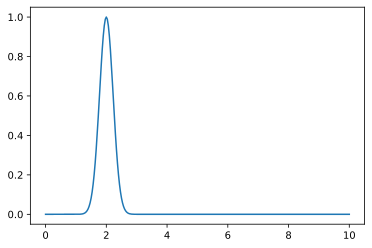

In [3]:
# Initial condition
u0 = np.exp(-(x-2.)**2/0.1)
plt.plot(x,u0)

The advection equation will be used to translate the pulse to the right. No diffusion is defined, so the pulse will maintain its shape. The advection equation is:

$$ \frac{\partial u}{\partial t} = c \frac{\partial u}{\partial x} $$

which, in discretized form, is:

$$ u_i^{n+1} = u_i^n + c\Delta t \frac{u_{i+1}^n - u_{i-1}^n}{2\Delta x} $$

In [18]:
dt = 1e-3
t_end = 1.
t = 0.
c = -2. # wave speed, m/s
cfl = c*dt/(dx*2) # Cauchy-Friedrichs-Lewy number
n_plots = 50
n_steps = t_end/dt
plot_step = n_steps/n_plots

In [19]:
sol = []          # Empty list to store solutions in time
sol.append(u0)    # Initial condition
sol_plot = np.empty((n, n_plots+1))
tplot = np.empty(n_plots+1)
sol_plot[:, 0] = np.copy(u0)

In [20]:
# Boundary conditions excluded
# Using vectorized array operations instead of for loops
iplot = 1
step = 0
sol_plot[:,step] = np.copy(u0)
while t < t_end: ## MAIN LOOP ##
    un = np.copy(sol[-1])
    unew = np.copy(un)
    unew[1:-1] = un[1:-1] + cfl * (un[2:]-un[:-2])
    sol.append(unew)
    t += dt
    step += 1
    if step % plot_step < 1:
        sol_plot[:,iplot] = np.copy(unew)
        tplot[iplot] = (step+1)*dt
        iplot += 1
        print(f'finished {step} of {n_steps} steps')

finished 20 of 1000.0 steps
finished 40 of 1000.0 steps
finished 60 of 1000.0 steps
finished 80 of 1000.0 steps
finished 100 of 1000.0 steps
finished 120 of 1000.0 steps
finished 140 of 1000.0 steps
finished 160 of 1000.0 steps
finished 180 of 1000.0 steps
finished 200 of 1000.0 steps
finished 220 of 1000.0 steps
finished 240 of 1000.0 steps
finished 260 of 1000.0 steps
finished 280 of 1000.0 steps
finished 300 of 1000.0 steps
finished 320 of 1000.0 steps
finished 340 of 1000.0 steps
finished 360 of 1000.0 steps
finished 380 of 1000.0 steps
finished 400 of 1000.0 steps
finished 420 of 1000.0 steps
finished 440 of 1000.0 steps
finished 460 of 1000.0 steps
finished 480 of 1000.0 steps
finished 500 of 1000.0 steps
finished 520 of 1000.0 steps
finished 540 of 1000.0 steps
finished 560 of 1000.0 steps
finished 580 of 1000.0 steps
finished 600 of 1000.0 steps
finished 620 of 1000.0 steps
finished 640 of 1000.0 steps
finished 660 of 1000.0 steps
finished 680 of 1000.0 steps
finished 700 of 10

In [28]:
fig = plt.figure(figsize=(11,7))
ax = fig.gca(projection='3d')
t = np.linspace(0, t_end, n)
X, T = np.meshgrid(tplot[0:iplot], x)
surf = ax.plot_surface(T, X, sol_plot[:,0:iplot], rstride=1, cstride=1, cmap=cm.viridis)
#ax.view_init(elev=30, azim=190)
ax.set_xlabel('X')
ax.set_ylabel('time')

Text(0.5, 0, 'time')

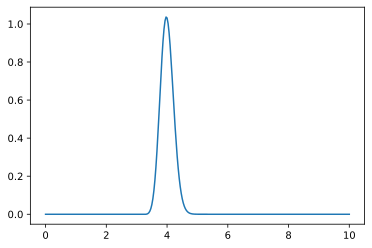

In [8]:
plt.plot(x, sol[-1])

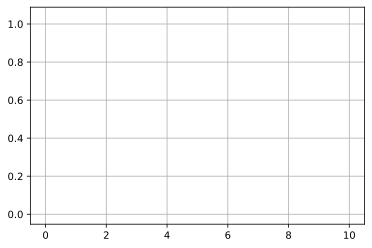

In [44]:
ims = []
fig = plt.figure()
plt.grid()

i = 0
for solution in sol:
    if (i%10==0):
        im = plt.plot(x, solution, 'k', animated=True)
        ims.append(im)
    i += 1
    
ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True, repeat_delay=1000)

ani.save('fcts.mp4',writer='ffmpeg')

In [45]:
%%HTML
<video width="320" height="240" controls>
    <source src="fcts.mp4" type="video/mp4">
</video>